In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabula import read_pdf

In [25]:
data2022_1 = read_pdf("Citaciones_inscripcion_pregrado_2022_1S_compressed.pdf", pages="all")


# es una lista de dataframes, en la que cada posicion es una pagina del pdf

In [26]:
data2022_2 = read_pdf("CITACIONES_PRE_MEDELLIN_20222S.pdf", pages="all")

In [27]:
# arreglar nombres de columnas
data2022_1[0].columns = ["DOCUMENTO", "GRUPO", "CONCEPTO", "EV_DOCENTE", "PAPPI", "DIA", "FRANJA"]
data2022_1[0].drop(index=[0, 1], inplace=True)

for pagina in data2022_1[1:]:
    pagina.columns = ["DOCUMENTO", "GRUPO", "CONCEPTO", "EV_DOCENTE", "PAPPI", "DIA", "FRANJA"]

sem_2022_1 = pd.concat(data2022_1, ignore_index=True)

sem_2022_1["PAPPI"] = sem_2022_1["PAPPI"].apply(lambda pappi: pappi.replace(",", ".") if type(pappi) is str else pappi )
sem_2022_1["PAPPI"] = pd.to_numeric(sem_2022_1["PAPPI"])
# sem_2022_1.dropna(subset=["PAPPI"], inplace=True)

sem_2022_1.sample(10)

,DOCUMENTO,GRUPO,CONCEPTO,EV_DOCENTE,PAPPI,DIA,FRANJA
10477,1112787508,GRUPO 3,NaN,NO,4.3,1/03/22,08:00 a 08:30
5639,1045327492,GRUPO 3,NaN,SI,4.1,28/02/22,13:00 a 13:30
2240,1122785632,GRUPO 3,NaN,SI,4.7,28/02/22,08:30 a 09:00
1279,1036676119,GRUPO 2,NaN,NO,4.7,28/02/22,08:00 a 08:30
11820,1000768400,GRUPO 3,NaN,NO,3.8,1/03/22,09:00 a 09:30
4948,1152222074,GRUPO 3,NaN,SI,4.2,28/02/22,11:30 a 12:00
9328,1002457790,GRUPO 3,NaN,SI,3.3,1/03/22,07:00 a 07:30
5484,1001248869,GRUPO 3,NaN,SI,4.1,28/02/22,13:00 a 13:30
10293,1037582226,GRUPO 3,NaN,NO,4.4,1/03/22,07:30 a 08:00
4472,1152701489,GRUPO 3,NaN,SI,4.2,28/02/22,11:00 a 11:30


In [28]:
# arreglar nombres de columnas
data2022_2[0].columns = ["DOCUMENTO", "GRUPO", "CONCEPTO", "AVANCE CARRERA", "EV_DOCENTE", "PAPPI", "DIA", "FRANJA"]
data2022_2[0].drop(index=[0,1], inplace=True)

for pagina in data2022_2[1:]:
    pagina.columns = ["DOCUMENTO", "GRUPO", "CONCEPTO", "AVANCE CARRERA", "EV_DOCENTE", "PAPPI", "DIA", "FRANJA"]

sem_2022_2 = pd.concat(data2022_2, ignore_index=True)

sem_2022_2["PAPPI"] = sem_2022_2["PAPPI"].apply(lambda pappi: pappi.replace(",", ".") if type(pappi) is str else pappi )
sem_2022_2["PAPPI"] = pd.to_numeric(sem_2022_2["PAPPI"])

# en este semestre crearon un nuevo grupo 1 que es de los discapacitados, por lo tanto ahora el grupo 2 es el antiguo grupo 1 y asi con el resto
sem_2022_2.loc[sem_2022_2["GRUPO"] == "GRUPO 2", "GRUPO"] = "GRUPO 1"
sem_2022_2.loc[sem_2022_2["GRUPO"] == "GRUPO 3", "GRUPO"] = "GRUPO 2"
sem_2022_2.loc[sem_2022_2["GRUPO"] == "GRUPO 4", "GRUPO"] = "GRUPO 3"

sem_2022_2.sample(10)

,DOCUMENTO,GRUPO,CONCEPTO,AVANCE CARRERA,EV_DOCENTE,PAPPI,DIA,FRANJA
1705,1094972069,GRUPO 2,NaN,"97,6",NO,1.6,28/07/22,08:00 a 08:30
1230,1037667363,GRUPO 2,NaN,"84,3",NO,4.6,28/07/22,08:00 a 08:30
833,1017166385,GRUPO 2,NaN,"94,9",SI,4.1,28/07/22,07:30 a 08:00
9763,1000569947,GRUPO 3,NaN,4,SI,0.0,29/07/22,07:00 a 07:30
14074,1020488156,GRUPO 3,NaN,"1,7",NO,0.0,29/07/22,11:00 a 11:30
3361,1006107716,GRUPO 3,NaN,60,SI,4.2,28/07/22,10:00 a 10:30
1094,1075669997,GRUPO 2,NaN,90,SI,3.2,28/07/22,07:30 a 08:00
13933,1152213705,GRUPO 3,NaN,5,NO,0.0,29/07/22,11:00 a 11:30
8917,1006769280,GRUPO 3,NaN,"22,8",SI,2.0,28/07/22,16:30 a 17:00
14416,1000399933,GRUPO 3,NaN,0,NO,0.0,29/07/22,11:30 a 12:00


### preguntas a desarrollar
1. mirar la distribucion de los PAPPIS
2. comparar el PAPPI promedio general y entre los diferentes grupos de cada semestre
3. comparar el PAPPI promedio entre los que hicieron la evaluacion docente y los que no, general y dentro del mismo grupo de cada semestre
4. prueba de hipotesis de si los promedios de PAPPI de cada semestre son estadisticamente != <= >=

## 1. mirar la distribucion de los PAPPIS

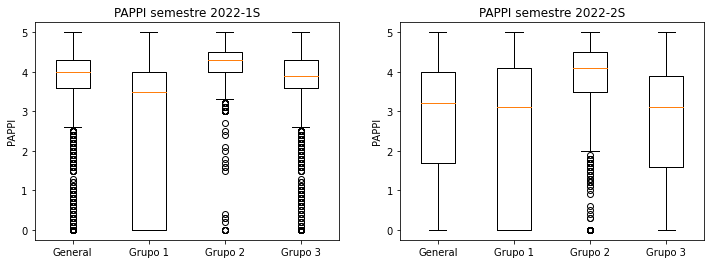

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor="w", figsize=(12,4))

boxes1 = [
    sem_2022_1["PAPPI"],
    sem_2022_1.query("GRUPO == 'GRUPO 1'")["PAPPI"],
    sem_2022_1.query("GRUPO == 'GRUPO 2'")["PAPPI"],
    sem_2022_1.query("GRUPO == 'GRUPO 3'")["PAPPI"],
]

ax1.boxplot(boxes1, labels=["General", "Grupo 1", "Grupo 2", "Grupo 3"])
ax1.set_ylabel("PAPPI")
ax1.set_title("PAPPI semestre 2022-1S")

boxes2 = [
    sem_2022_2["PAPPI"],
    sem_2022_2.query("GRUPO == 'GRUPO 1'")["PAPPI"],
    sem_2022_2.query("GRUPO == 'GRUPO 2'")["PAPPI"],
    sem_2022_2.query("GRUPO == 'GRUPO 3'")["PAPPI"],
]

ax2.boxplot(boxes2, labels=["General", "Grupo 1", "Grupo 2", "Grupo 3"])
ax2.set_ylabel("PAPPI")
ax2.set_title("PAPPI semestre 2022-2S")

plt.show()

Para el semestre 2022-1S en general se ven valores extremos hacia los PAPPIS bajos, destaca el grupo 1 el rango intercuartilico es enorme (creo que es porque los datos estan muy dispersos), los PAPPIS suelen distribuirse no muy dispersos al rededor de 4 para todos los grupos exepto el 1

Para el semestre 2022-2S ya no se ven tantos valores extremos hacia PAPPIS bajos (tal vez debido a que la gente cancelo menos ya que no estaba la garantia de que las materias perdidas no contaban en el PAPPI), en general los PAPPIS bajaron (como era de esperarse) de estar al rededor de 4 a estar al rededor de 3, cabe resaltar que en el 2022-2S el rango intercuartilico aumento en todos los gupos lo que significa que los PAPPIS estan mas dispersos (osea que ya no todos los estudiantes de cada grupo tienen PAPPIS similares si no que ahora hay PAPPIS mucho mas desiguales en cada grupo)

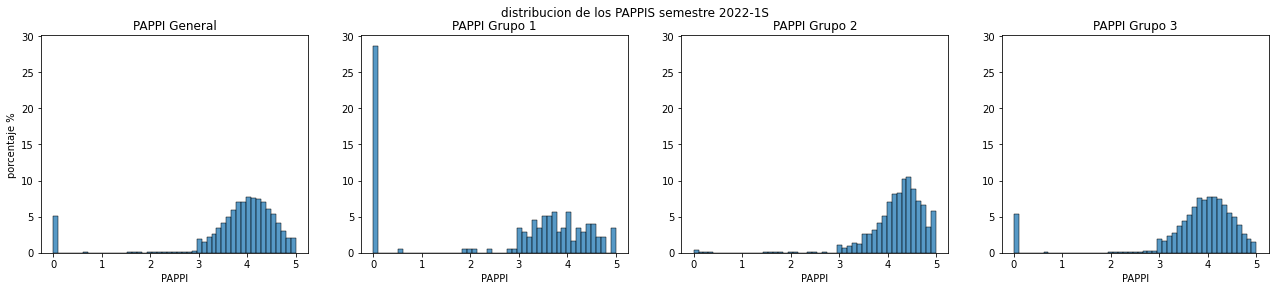

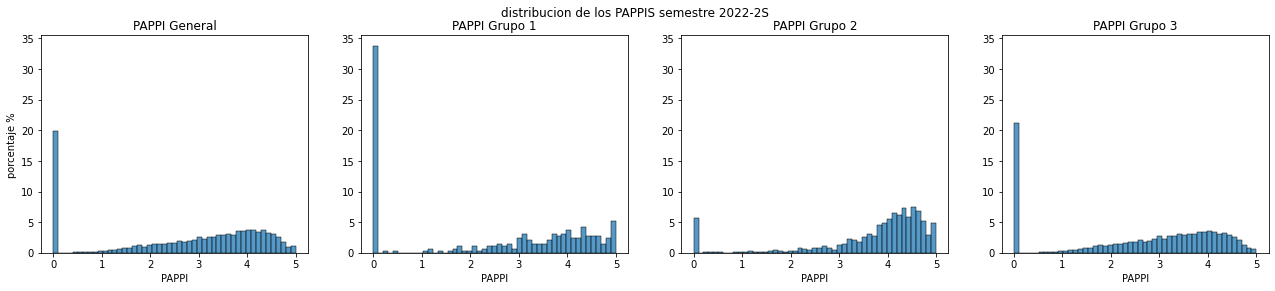

In [39]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, facecolor="w", figsize=(22,4), sharey=True)
fig.suptitle("distribucion de los PAPPIS semestre 2022-1S")

nbins = 49

# ax1.hist(sem_2022_1["PAPPI"], bins=50, density=True)
sns.histplot(x=sem_2022_1["PAPPI"], bins=nbins, stat="percent", ax=ax1)
ax1.set_title("PAPPI General")
ax1.set_ylabel("porcentaje %")

# ax2.hist(sem_2022_1.query("GRUPO == 'GRUPO 1'")["PAPPI"], density=True)
sns.histplot(x=sem_2022_1.query("GRUPO == 'GRUPO 1'")["PAPPI"], bins=nbins, stat="percent", ax=ax2)
ax2.set_title("PAPPI Grupo 1")

# ax3.hist(sem_2022_1.query("GRUPO == 'GRUPO 2'")["PAPPI"], density=True)
sns.histplot(x=sem_2022_1.query("GRUPO == 'GRUPO 2'")["PAPPI"], bins=nbins, stat="percent", ax=ax3)
ax3.set_title("PAPPI Grupo 2")

# ax4.hist(sem_2022_1.query("GRUPO == 'GRUPO 3'")["PAPPI"], density=True)
sns.histplot(x=sem_2022_1.query("GRUPO == 'GRUPO 3'")["PAPPI"], bins=nbins, stat="percent", ax=ax4)
ax4.set_title("PAPPI Grupo 3")

ax2.yaxis.set_tick_params(labelleft=True)
ax3.yaxis.set_tick_params(labelleft=True)
ax4.yaxis.set_tick_params(labelleft=True)

# semestre 2022-2S
fig2, (axi1, axi2, axi3, axi4) = plt.subplots(1, 4, facecolor="w", figsize=(22,4), sharey=True)
fig2.suptitle("distribucion de los PAPPIS semestre 2022-2S")

sns.histplot(x=sem_2022_2["PAPPI"], bins=nbins, stat="percent", ax=axi1)
axi1.set_title("PAPPI General")
axi1.set_ylabel("porcentaje %")

sns.histplot(x=sem_2022_2.query("GRUPO == 'GRUPO 1'")["PAPPI"], bins=nbins, stat="percent", ax=axi2)
axi2.set_title("PAPPI Grupo 1")

sns.histplot(x=sem_2022_2.query("GRUPO == 'GRUPO 2'")["PAPPI"], bins=nbins, stat="percent", ax=axi3)
axi3.set_title("PAPPI Grupo 2")

sns.histplot(x=sem_2022_2.query("GRUPO == 'GRUPO 3'")["PAPPI"], bins=nbins, stat="percent", ax=axi4)
axi4.set_title("PAPPI Grupo 3")

axi2.yaxis.set_tick_params(labelleft=True)
axi3.yaxis.set_tick_params(labelleft=True)
axi4.yaxis.set_tick_params(labelleft=True)

plt.show()

para el 2022-1S los pappis suelen estar entre 3 y 5 y tambien hay una acolumacion de pappis en 0 especialmente en el grupo 1 en proporcion a la cantidad de personas que estan en ese grupo la distribucion de los pappis general y del grupo 3 son muy similares, seguramente debido a que la inmensa mayoria de estudiantes estan en el grupo 3

para el 2022-2S la dispersion de los PAPPIS aumento en todos los grupos como se vio en los boxplots, tambien hay un aumento significativo de PAPPIS en 0 (tal vez porque muchos cancelaron semestre debido al cambio de virtualidad a presencialidad), paso de haber cerca de un 5% de PAPPIS en 0 a haber al rededor de 20% de PAPPIS en 0

el grupo 1 tiene una gran cantidad de PAPPIS en 0 en ambos semestres y aunque aumento para el 2022-2S, sospecho que eso debe de ser algo administrativo

## 2. comparar el PAPPI promedio entre los diferentes grupos

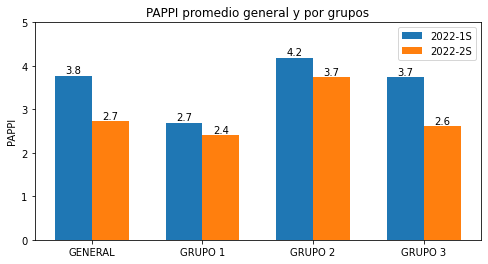

In [42]:
PAPPIS1 = sem_2022_1.groupby("GRUPO", as_index=False)["PAPPI"].mean()
PAPPIS1 = pd.concat([pd.DataFrame({"GRUPO": ["GENERAL"], "PAPPI": sem_2022_1["PAPPI"].mean()}), PAPPIS1])

PAPPIS2 = sem_2022_2.groupby("GRUPO", as_index=False)["PAPPI"].mean()
PAPPIS2 = pd.concat([pd.DataFrame({"GRUPO": ["GENERAL"], "PAPPI": sem_2022_2["PAPPI"].mean()}), PAPPIS2])

plt.figure(facecolor="w", figsize=(8,4))

bars1 = plt.bar([1, 4, 7, 10], PAPPIS1["PAPPI"], label="2022-1S", width=1)
bars2 = plt.bar([2, 5, 8, 11], PAPPIS2["PAPPI"], label="2022-2S", width=1) # cambiar con los datos del 2022-2S
plt.title("PAPPI promedio general y por grupos")
plt.ylim([0,5])
plt.ylabel("PAPPI")
plt.bar_label(bars1, labels=np.round(PAPPIS1["PAPPI"],1))
plt.bar_label(bars2, labels=np.round(PAPPIS2["PAPPI"],1))
plt.legend()

plt.gca().set_xticks([1.5, 4.5, 7.5, 10.5])
plt.gca().set_xticklabels(labels=PAPPIS1["GRUPO"])

plt.show()

en general se ve que para todos los grupos en promedio bajo el PAPPI, pero la gran cantidad de PAPPIS en 0 esta afectando el promedio

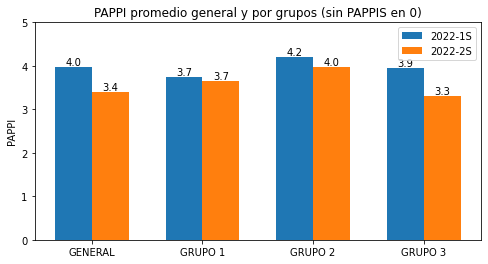

In [45]:
PAPPIS1 = sem_2022_1.query("PAPPI != 0").groupby("GRUPO", as_index=False)["PAPPI"].mean()
PAPPIS1 = pd.concat([pd.DataFrame({"GRUPO": ["GENERAL"], "PAPPI": sem_2022_1.query("PAPPI != 0")["PAPPI"].mean()}), PAPPIS1])

PAPPIS2 = sem_2022_2.query("PAPPI != 0").groupby("GRUPO", as_index=False)["PAPPI"].mean()
PAPPIS2 = pd.concat([pd.DataFrame({"GRUPO": ["GENERAL"], "PAPPI": sem_2022_2.query("PAPPI != 0")["PAPPI"].mean()}), PAPPIS2])

plt.figure(facecolor="w", figsize=(8,4))

bars1 = plt.bar([1, 4, 7, 10], PAPPIS1["PAPPI"], label="2022-1S", width=1)
bars2 = plt.bar([2, 5, 8, 11], PAPPIS2["PAPPI"], label="2022-2S", width=1) # cambiar con los datos del 2022-2S
plt.title("PAPPI promedio general y por grupos (sin PAPPIS en 0)")
plt.ylim([0,5])
plt.ylabel("PAPPI")
plt.bar_label(bars1, labels=np.round(PAPPIS1["PAPPI"],1))
plt.bar_label(bars2, labels=np.round(PAPPIS2["PAPPI"],1))
plt.legend()

plt.gca().set_xticks([1.5, 4.5, 7.5, 10.5])
plt.gca().set_xticklabels(labels=PAPPIS1["GRUPO"])

plt.show()

quitando los PAPPIS en 0, se ve que igualmente bajaron los PAPPIS, pero el cambio ya no es tan bruzco

## 3. comparar el PAPPI promedio entre los que hicieron la evaluacion docente y los que no, general y dentro del mismo grupo

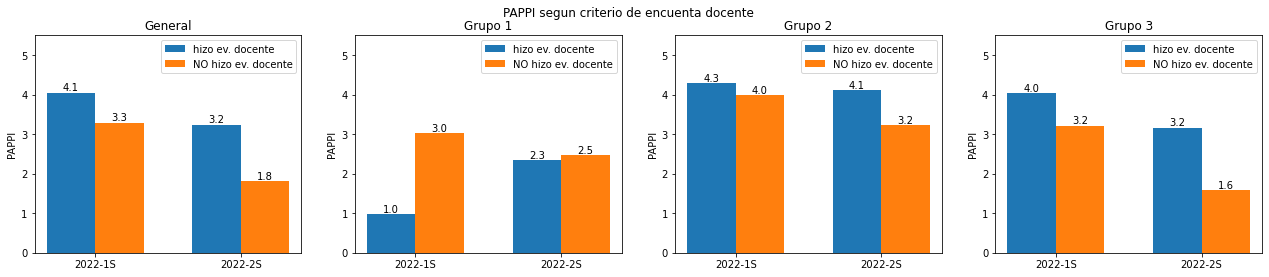

In [50]:
general2022_1 = [
    sem_2022_1.query("EV_DOCENTE == 'SI'")["PAPPI"].mean(),
    sem_2022_1.query("EV_DOCENTE == 'NO'")["PAPPI"].mean()
]

general2022_2 = [
    sem_2022_2.query("EV_DOCENTE == 'SI'")["PAPPI"].mean(),
    sem_2022_2.query("EV_DOCENTE == 'NO'")["PAPPI"].mean()
]

grupos2022_1 = sem_2022_1.groupby(["GRUPO", "EV_DOCENTE"])["PAPPI"].mean()
grupos2022_2 = sem_2022_2.groupby(["GRUPO", "EV_DOCENTE"])["PAPPI"].mean()

fig, axes = plt.subplots(1,4, facecolor="w", figsize=(22,4))

fig.suptitle("PAPPI segun criterio de encuenta docente")

# cambiar datos del 2022-2S
bar_SI = axes[0].bar([1, 4], [general2022_1[0], general2022_2[0]], label="hizo ev. docente", width=1)
bar_NO = axes[0].bar([2, 5], [general2022_1[1], general2022_2[1]], label="NO hizo ev. docente", width=1)
axes[0].bar_label(bar_SI, np.round([ general2022_1[0], general2022_2[0] ], 1))
axes[0].bar_label(bar_NO, np.round([ general2022_1[1], general2022_2[1] ], 1))
axes[0].set_title("General")

for i in range(1, 3+1):
    bar_SI = axes[i].bar([1, 4], [ grupos2022_1[(f"GRUPO {i}", "SI")], grupos2022_2[(f"GRUPO {i}", "SI")] ], label="hizo ev. docente", width=1)
    bar_NO = axes[i].bar([2, 5], [ grupos2022_1[(f"GRUPO {i}", "NO")], grupos2022_2[(f"GRUPO {i}", "NO")] ], label="NO hizo ev. docente", width=1)
    axes[i].bar_label(bar_SI, np.round( [grupos2022_1[(f"GRUPO {i}", "SI")], grupos2022_2[(f"GRUPO {i}", "SI")]] , 1))
    axes[i].bar_label(bar_NO, np.round( [grupos2022_1[(f"GRUPO {i}", "NO")], grupos2022_2[(f"GRUPO {i}", "NO")]] , 1))
    axes[i].set_title(f"Grupo {i}")


for ax in axes:
    ax.set_ylim([0,5.5])
    ax.set_ylabel("PAPPI")
    ax.legend()

    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["2022-1S", "2022-2S"])

plt.show()

en general se ve que los que hacen la evaluacion docente en promedio tienen mejor pappi excepto en el grupo 1, en el cual sospecho que hay alguna variable administrativa que afecta, se ve tambien que los PAPPIS bajaron del 2022-1S al 2022-2S pero hay que tener en cuenta la gran cantidad de PAPPIS en 0

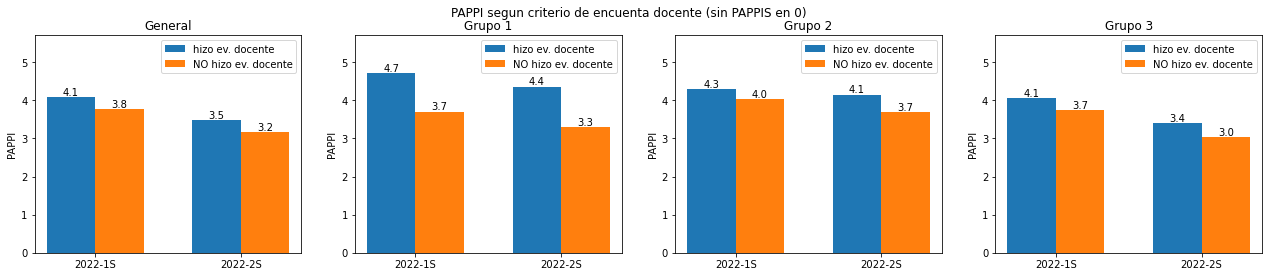

In [54]:
general2022_1 = [
    sem_2022_1.query("EV_DOCENTE == 'SI' and PAPPI != 0")["PAPPI"].mean(),
    sem_2022_1.query("EV_DOCENTE == 'NO' and PAPPI != 0")["PAPPI"].mean()
]

general2022_2 = [
    sem_2022_2.query("EV_DOCENTE == 'SI' and PAPPI != 0")["PAPPI"].mean(),
    sem_2022_2.query("EV_DOCENTE == 'NO' and PAPPI != 0")["PAPPI"].mean()
]

grupos2022_1 = sem_2022_1.query("PAPPI != 0").groupby(["GRUPO", "EV_DOCENTE"])["PAPPI"].mean()
grupos2022_2 = sem_2022_2.query("PAPPI != 0").groupby(["GRUPO", "EV_DOCENTE"])["PAPPI"].mean()

fig, axes = plt.subplots(1,4, facecolor="w", figsize=(22,4))

fig.suptitle("PAPPI segun criterio de encuenta docente (sin PAPPIS en 0)")

# cambiar datos del 2022-2S
bar_SI = axes[0].bar([1, 4], [general2022_1[0], general2022_2[0]], label="hizo ev. docente", width=1)
bar_NO = axes[0].bar([2, 5], [general2022_1[1], general2022_2[1]], label="NO hizo ev. docente", width=1)
axes[0].bar_label(bar_SI, np.round([ general2022_1[0], general2022_2[0] ], 1))
axes[0].bar_label(bar_NO, np.round([ general2022_1[1], general2022_2[1] ], 1))
axes[0].set_title("General")

for i in range(1, 3+1):
    bar_SI = axes[i].bar([1, 4], [ grupos2022_1[(f"GRUPO {i}", "SI")], grupos2022_2[(f"GRUPO {i}", "SI")] ], label="hizo ev. docente", width=1)
    bar_NO = axes[i].bar([2, 5], [ grupos2022_1[(f"GRUPO {i}", "NO")], grupos2022_2[(f"GRUPO {i}", "NO")] ], label="NO hizo ev. docente", width=1)
    axes[i].bar_label(bar_SI, np.round( [grupos2022_1[(f"GRUPO {i}", "SI")], grupos2022_2[(f"GRUPO {i}", "SI")]] , 1))
    axes[i].bar_label(bar_NO, np.round( [grupos2022_1[(f"GRUPO {i}", "NO")], grupos2022_2[(f"GRUPO {i}", "NO")]] , 1))
    axes[i].set_title(f"Grupo {i}")


for ax in axes:
    ax.set_ylim([0,5.7])
    ax.set_ylabel("PAPPI")
    ax.legend()

    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["2022-1S", "2022-2S"])

plt.show()

finalmente quitando los PAPPIS en 0, se ve que ahora si en todos los grupos, las personas que hacen la evaluacion docente en promedio tienen mejor PAPPI